In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [9]:
df=pd.read_csv("boston.csv")

In [10]:
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO   BLACK  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [16]:
def RemoveOutlier(df,var):
    Q1=df[var].quantile(0.25)
    Q3=df[var].quantile(0.75)
    IQR=Q3-Q1
    high,low=Q3+1.5*IQR ,Q1-1.5+IQR
    df=df[((df[var]>=low)&df[var]<=high)]
    return df

In [17]:
 def DisplayOutlier(df, msg):
    fig,axes=plt.subplots(1,2)
    fig.suptitle(msg)
    sns.boxplot(data=df, x="rm", ax=axes[0])
    sns.boxplot(data = df, x="lstat", ax=axes[1])
    fig.tight_layout()
    plt.show()

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv(r"boston.csv")

In [22]:
print("boston datasate is successfully loaded")

boston datasate is successfully loaded


In [25]:
print("information of datasate :\n" ,df.info)
print("shape of dataset row*column:\n", df.shape)
print("Columns Name:", df.columns)
print("Total elements in dataset:",df.size)
print("Datatype of attributes (columns):" ,df.dtypes)
print("First 5 rows: \n", df.head().T)
print("last 5 rows:\n",df.tail().T)
print("Any 5 rows: \n",df.sample(5).T)

information of datasate :
 <bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO   BLACK  LSTAT  MEDV  
0   

In [26]:
print("missing values")

missing values


In [27]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64


finding correlation matrix using heatmap


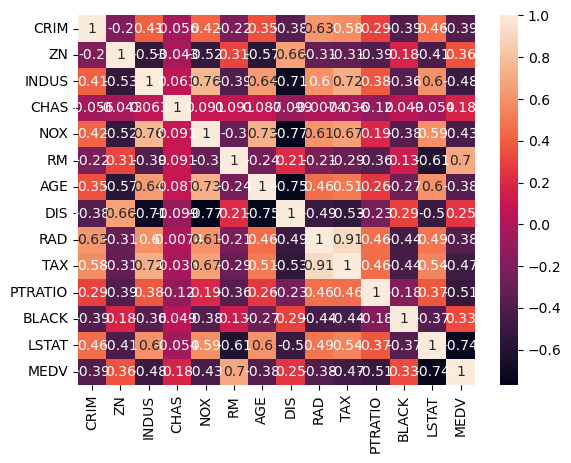

In [29]:
print("finding correlation matrix using heatmap")
sns.heatmap(df.corr(),annot=True)
plt.show()

Finding and removing outliers: 


ValueError: Could not interpret input 'rm'

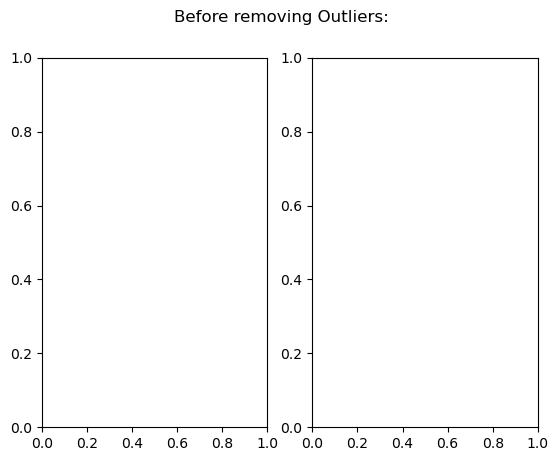

In [38]:
print("Finding and removing outliers: ")
DisplayOutlier(df, "Before removing Outliers:")


Identifying overall outliers in Column Name variables


ValueError: Could not interpret input 'rm'

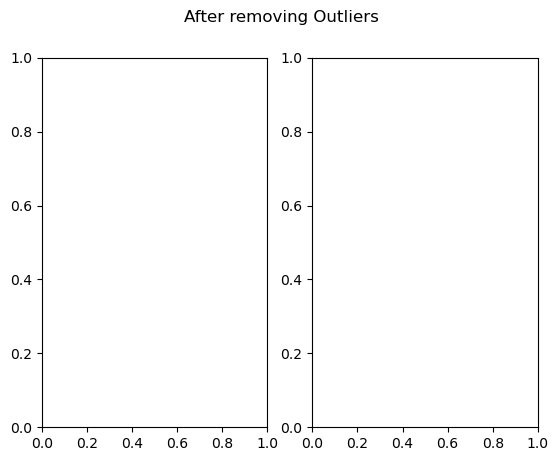

In [37]:
print("Identifying overall outliers in Column Name variables")
df = RemoveOutlier(df, "LSTAT")
df = RemoveOutlier(df,"RM")
DisplayOutlier(df,"After removing Outliers")

In [39]:
x=df[["RM","LSTAT"]]

In [40]:
y=df["MEDV"]

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20, random_state=0)


In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train, y_train)
y_pred=model.predict(x_test)


In [44]:
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test,y_pred))
print("Model Score:",model.score(x_test,y_test))


MAE: 4.142444656238561
Model Score: 0.5409084827186417


In [45]:
print("Predict House Price by giving User Input:")
features= np.array([[6,19]])
prediction= model.predict(features)
print("Prediction: ()".format(prediction))

Predict House Price by giving User Input:
Prediction: ()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
